In [1]:
import nease
import pandas as pd
from NEASE import nease
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import mygene


### VastDB pre-processing

In [2]:
data_folder='AS data/vastdb/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)
len(events)

68982

In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
events= events  [ (events['LENGTH']>=3)  &  (events['COMPLEX'].isin(['S*','S'])) ]
len(events)

20300

In [6]:
# extract the events in the following tissues
tissue={}

#muscles
tissue['Muscles']=['Heart_c' ,'Heart_a' ,'Heart_b','Muscle_b','Muscle_e']

#Embryonic Brain
#tissue['Embryonic']=['Embr_Forebrain_St13_14']

#Neural
tissue['Neural']=['Whole_Brain_b','Cortex','Retina_peripheral']


#Placental
tissue['Placental']=['Placenta_a' , 'Placenta_b' , 'Placenta_c' ]

# Epithelial
tissue['Epithelial']= [ 'Skin' , 'Placenta_Epith' , 'EpithelialCells'] 


# Digestive Tract
tissue['Digestive']= [ 'Colon_b' ,'Stomach_a','Stomach_b'  ]

# Liver
tissue['liver']= ['Liver_a' , 'Liver_b' ,'Liver_c' ]

# Kidney
tissue['Kidney']=['Kidney_c','Kidney_b']

# Adipose
tissue['Adipose']= [ 'Adipose_b' , 'Adipose_c' , 'Adipose_d']


# Testis
tissue['Testis']=[ 'Testis_a', 'Testis_c']



#Immune-Hematopoietic
tissue['Immune-Hematopoietic']=['Bone_marrow_a', 'Bone_marrow_b','Lymph_node_c']

#Ovary
tissue['Ovary']=['Ovary_a','Ovary_b']


In [7]:
tissues=[]
for x in list(tissue.values()):
    tissues=tissues+x

In [8]:

events=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]

In [9]:
events

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Whole_Brain_b,Cortex,Retina_peripheral,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b,Heart_c-Q,Heart_a-Q,Heart_b-Q,Muscle_b-Q,Muscle_e-Q,Whole_Brain_b-Q,Cortex-Q,Retina_peripheral-Q,Placenta_a-Q,Placenta_b-Q,Placenta_c-Q,Skin-Q,Placenta_Epith-Q,EpithelialCells-Q,Colon_b-Q,Stomach_a-Q,Stomach_b-Q,Liver_a-Q,Liver_b-Q,Liver_c-Q,Kidney_c-Q,Kidney_b-Q,Adipose_b-Q,Adipose_c-Q,Adipose_d-Q,Testis_a-Q,Testis_c-Q,Bone_marrow_a-Q,Bone_marrow_b-Q,Lymph_node_c-Q,Ovary_a-Q,Ovary_b-Q
14382,HsaEX0000001,88.24,NaN,60.00,100.00,NaN,60.00,62.96,50.00,75.00,NaN,100.00,NaN,NaN,NaN,33.33,NaN,100.00,NaN,50.00,100.00,88.89,60.00,NaN,100.00,20.00,100.00,72.41,100.00,100.00,71.43,100.00,69.23,"N,N,N,B1,S@14.12,1.88","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.40,1.60","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@7.20,4.80","N,N,N,B1,S@13.85,8.15","N,N,N,B1,S@6.00,6.00","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@1.50,1.50","N,N,N,Bn,S@2.00,0.00","VLOW,VLOW,VLOW,B1,S@30.22,3.78","N,N,N,B1,S@7.20,4.80","N,N,N,Bn,S@0,0","N,N,N,Bn,S@8.00,0.00","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@2.00,0.00","N,N,N,B2,S@18.10,6.90","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@4.29,1.71","N,N,N,Bn,S@2.00,0.00","N,N,N,OK,S@7.62,3.38"
14383,HsaEX0000002,100.00,NaN,NaN,NaN,100.00,100.00,NaN,100.00,100.00,100.00,100.00,100.00,100.00,NaN,NaN,NaN,100.00,NaN,NaN,100.00,100.00,100.00,100.00,100.00,NaN,100.00,100.00,NaN,NaN,100.00,NaN,NaN,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,B1,S@7.00,0.00","N,N,N,Bn,S@0,0","N,N,N,OK,S@12.00,0.00","VLOW,VLOW,VLOW,B1,S@31.00,0.00","N,N,N,Bn,S@8.00,0.00","N,N,N,B1,S@22.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@5.00,0.00","N,N,N,OK,S@3.00,0.00","N,N,N,B1,S@4.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0"
14384,HsaEX0000003,70.15,100.00,81.82,100.00,100.00,100.00,71.43,55.56,35.48,NaN,100.00,100.00,NaN,NaN,NaN,NaN,28.57,NaN,100.00,60.00,74.36,33.33,73.33,82.46,64.00,45.45,40.00,NaN,35.00,69.70,50.00,100.00,"VLOW,VLOW,VLOW,B2,S@39.99,17.01","N,N,N,Bn,S@7.00,0.00","N,N,N,Bn,S@8.18,1.82","N,N,N,Bn,S@11.00,0.00","N,N,N,Bn,S@4.00,0.00","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@4.29,1.71","N,N,N,Bn,S@3.89,3.11","VLOW,VLOW,VLOW,B2,S@7.45,13.55","N,N,N,Bn,S@0,0","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.57,6.43","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.40,1.60","N,N,N,B2,S@25.28,8.72","N,N,N,Bn,S@2.00,4.00","N,N,N,B2,S@19.07,6.93","VLOW,VLOW,VLOW,B2,S@85.76,18.24","N,N,N,B2,S@26.24,14.76","N,N,N,Bn,S@7.27,8.73","N,N,N,Bn,S@2.80,4.20","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,Bn,S@9.45,17.55","N,N,N,B2,S@19.52,8.48","N,N,N,Bn,S@1.50,1.50","N,N,N,Bn,S@3.00,0.00"
14385,HsaEX0000004,NaN,NaN,NaN,NaN,NaN,20.00,42.86,NaN,75.00,NaN,100.00,NaN,100.00,NaN,64.95,81.03,76.00,91.67,82.46,91.67,91.55,51.82,33.33,NaN,100.00,NaN,NaN,NaN,100.00,100.00,100.00,60.00,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@8.57,11.43","N,N,N,Bn,S@0,0","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@9.00,0.00","N,N,N,Bn,S@0,0","SOK,SOK,SOK,OK,S@103.92,56.08","VLOW,VLOW,VLOW,B2,S@85.08,19.92","LOW,LOW,LOW,OK,S@33.44,10.56","VLOW,VLOW,VLOW,OK,S@21.08,1.92","SOK,SOK,SOK,OK,S@128.64,27.36","VLOW,VL

In [10]:
# quality of dataset filter
psi=events
for t in tissues:
    psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
    #psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK'))]

psi=psi[['EVENT']+tissues]
len(psi)

2828

In [11]:
for t in list(tissue.keys()):

    psi[t]=psi[tissue[t]].mean(axis = 1, skipna = True) 

In [12]:
psi_tissue=psi[['EVENT']+list(tissue.keys())]

In [13]:
tissues=list(tissue.keys())

In [14]:
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary
14460,HsaEX0000112,87.404,94.183333,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510
14475,HsaEX0000140,0.892,1.663333,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565
14476,HsaEX0000143,0.088,0.220000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130
14510,HsaEX0000234,82.186,86.530000,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490
14625,HsaEX0000543,0.480,1.356667,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.620000,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240
50140,HsaEX0074521,0.942,0.570000,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200
50141,HsaEX0074523,99.246,100.000000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725
50145,HsaEX0074528,59.932,40.966667,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620


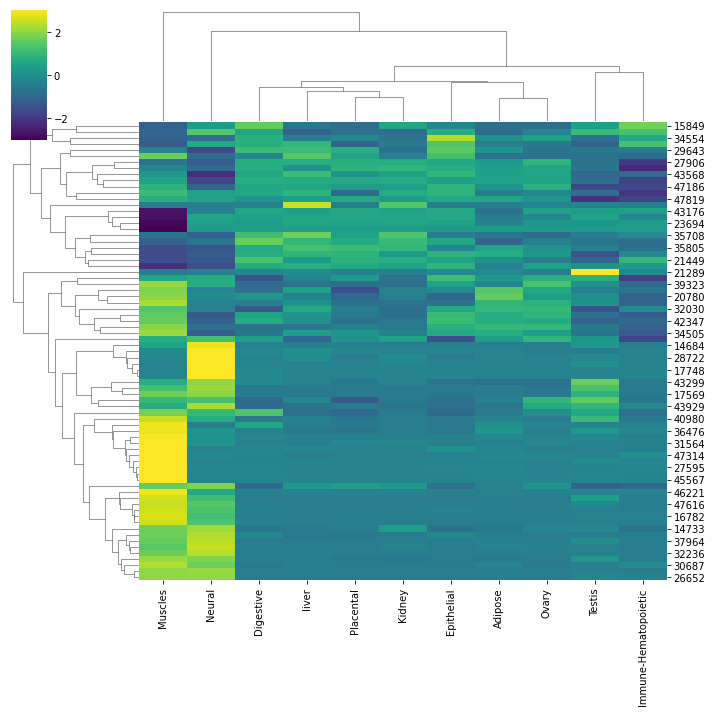

In [15]:
psi_tissue['std']=psi_tissue[tissues].std(axis = 1, skipna = True) 
psi_tissue['mean']=psi_tissue[tissues].mean(axis = 1, skipna = True) 
psi_var=psi_tissue[psi_tissue['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)
g.savefig("AS data/VastDB/Heatmap.pdf",format='pdf' )

In [16]:
tissue_interest='Muscles'
psi_tissue['Zscore']=(psi_tissue[tissue_interest] - psi_tissue['mean'])/psi_tissue['std']
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary,std,mean,Zscore
14460,HsaEX0000112,87.404,94.183333,94.700000,95.746667,97.266667,98.673333,98.280,95.410000,98.395,97.223333,90.510,3.528340,95.253848,-2.224799
14475,HsaEX0000140,0.892,1.663333,2.443333,2.310000,1.240000,2.306667,2.015,1.256667,4.605,1.986667,1.565,0.991271,2.025788,-1.143772
14476,HsaEX0000143,0.088,0.220000,0.120000,1.603333,0.236667,0.126667,0.465,0.690000,2.065,4.723333,0.130,1.415446,0.951636,-0.610151
14510,HsaEX0000234,82.186,86.530000,98.633333,90.413333,98.896667,99.320000,88.390,87.596667,94.800,72.000000,93.490,8.251929,90.205091,-0.971784
14625,HsaEX0000543,0.480,1.356667,1.516667,0.943333,20.790000,4.806667,0.575,1.186667,3.200,2.853333,3.330,5.819746,3.730758,-0.558574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,96.390,94.620000,89.600000,98.290000,98.403333,97.210000,92.655,97.450000,99.275,95.633333,96.240,2.823207,95.978788,0.145654
50140,HsaEX0074521,0.942,0.570000,0.430000,1.863333,0.573333,1.866667,1.815,1.666667,4.170,2.293333,5.200,1.511539,1.944576,-0.663282
50141,HsaEX0074523,99.246,100.000000,99.120000,98.056667,100.000000,99.540000,99.840,97.283333,99.830,92.980000,99.725,2.081487,98.692818,0.265763
50145,HsaEX0074528,59.932,40.966667,49.496667,74.046667,70.750000,53.230000,51.240,60.886667,35.775,34.400000,55.620,12.949944,53.303970,0.511819


In [17]:
psi_filtred=psi_tissue[ psi_tissue['Zscore']>2]
len(psi_filtred)

107

In [18]:
#psi_filtred=psi_filtred[  (psi_filtred['mean']>1) &   (psi_filtred['mean']<90) ]
psi_filtred=psi_filtred[  psi_filtred[tissue_interest]>20 ]
len(psi_filtred)

56

## Clustering and visualization

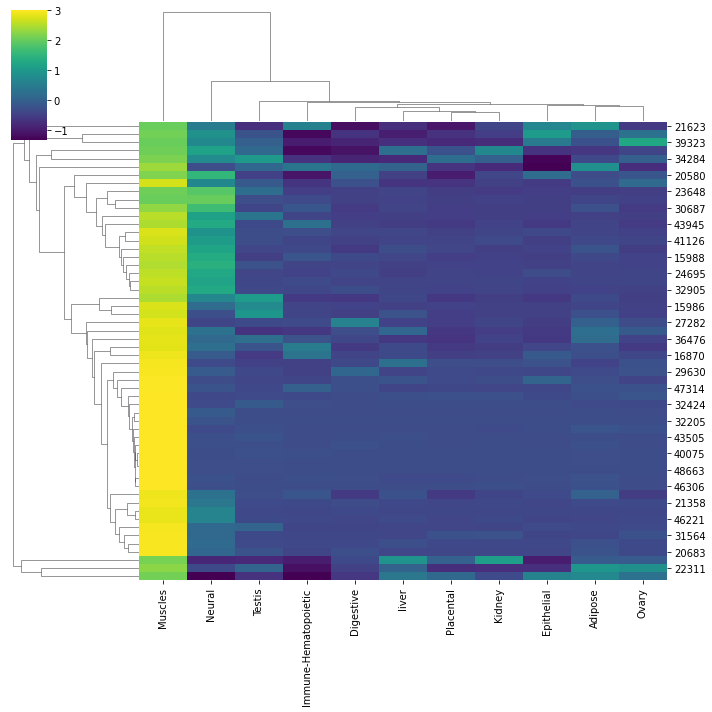

In [19]:
g = sns.clustermap(psi_filtred[tissues],cmap="viridis",z_score=0)

### Prepare the list of events in NEASE format

In [20]:

event_cord=pd.merge(annot,psi_filtred['EVENT'])    

event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
#event_cord=event_cord[['GENE','start','end']]
mg = mygene.MyGeneInfo()
out = mg.querymany(list(event_cord.GENE.unique()), scopes="symbol",  fields='ensembl.gene', species="human", verbose=False, as_dataframe = True,
                  df_index = True)
convert_help=out['ensembl.gene'].to_frame().dropna()

# convert gene names to gene IDs using nease functions
#convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_index=True)
input=input[['ensembl.gene','start','end']].drop_duplicates()
input.head(10)

,ensembl.gene,start,end
0,ENSG00000009307,114741527,114741673
1,ENSG00000068305,99703362,99703385
2,ENSG00000073921,85960675,85960777
3,ENSG00000077549,19342752,19342864
4,ENSG00000079805,10803639,10803668
5,ENSG00000086598,123587611,123587631
6,ENSG00000089597,62634310,62634375
7,ENSG00000107862,102354370,102354468
9,ENSG00000114416,180971075,180971155
11,ENSG00000118418,79202094,79202155


## NEASE analysis


In [21]:
# Run nease with standard input.
events=nease.run(input, organism='Human')


Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
12 protein domains are affected by AS.

0 linear motifs are affected by AS.
3 interacting resiude are affected by AS.

8 of the affected domains/motifs have known interactions.
60 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [22]:
# Run GENE-LEVEL enrichment on Reactome gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016'])
enr

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,trans-Golgi Network Vesicle Budding Homo sapiens R-HSA-199992,6/70,1.416003e-08,0.000002,0,0,45.477896,821.914871,GBF1;CLTC;AP3B1;SNX9;DNM2;PICALM
1,Reactome_2016,Clathrin derived vesicle budding Homo sapiens R-HSA-421837,6/70,1.416003e-08,0.000002,0,0,45.477896,821.914871,GBF1;CLTC;AP3B1;SNX9;DNM2;PICALM
2,Reactome_2016,Golgi Associated Vesicle Biogenesis Homo sapiens R-HSA-432722,5/54,1.670173e-07,0.000017,0,0,48.357629,754.628937,CLTC;AP3B1;SNX9;DNM2;PICALM
3,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,9/420,4.900792e-07,0.000036,0,0,11.261237,163.611121,DCTN1;GBF1;CLTC;TMED2;AP3B1;MIA3;SNX9;DNM2;PICALM
4,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-5653656,9/492,1.819895e-06,0.000108,0,0,9.547238,126.183277,DCTN1;GBF1;CLTC;TMED2;AP3B1;MIA3;SNX9;DNM2;PICALM
...,...,...,...,...,...,...,...,...,...,...
292,Reactome_2016,Hemostasis Homo sapiens R-HSA-109582,1/552,7.320542e-01,0.742048,0,0,0.765486,0.238756,CAPZB
293,Reactome_2016,Gene Expression Homo sapiens R-HSA-74160,3/1631,7.490357e-01,0.756679,0,0,0.767464,0.221773,RANBP2;RPN2;MAPKAP1
294,Reactome_2016,Signaling by GPCR Homo sapiens R-HSA-372790,2/1293,8.166740e-01,0.822211,0,0,0.642465,0.130109,ROCK2;CAMK2G
295,Reactome_2016,Generic Transcription Pathway Homo sapiens R-HSA-212436,1/812,8.577686e-01,0.860666,0,0,0.513108,0.078721,MAPKAP1


### NEASE analysis


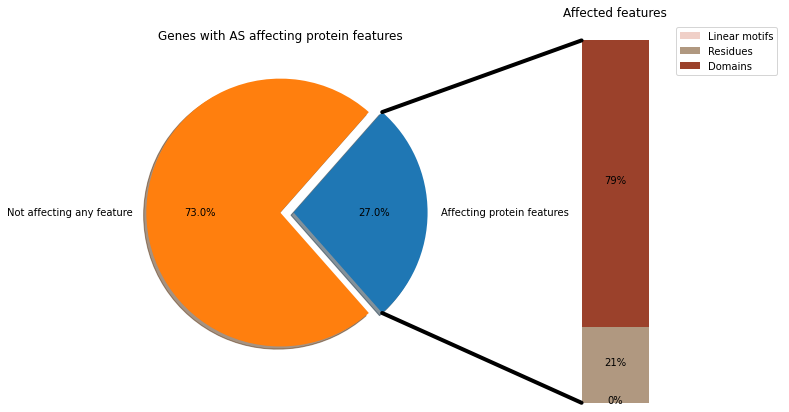

In [23]:
events.get_stats('AS data/VastDB/')

In [24]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains()

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,DNM2,1785,ENSG00000079805,ENSE00002760163,PF01031,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002760163
1,TMED2,10959,ENSG00000086598,ENSE00002313457,PF01105,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002313457
2,HMGN3,9324,ENSG00000118418,ENSE00003723579,PF01101,-,False,None,
3,MACF1,23499,ENSG00000127603,ENSE00001458939,PF02187,-,False,None,
4,MACF1,643314,ENSG00000127603,ENSE00001458939,PF02187,-,False,None,
5,TPM1,7168,ENSG00000140416,ENSE00001141183,PF00261,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001141183
6,DST,667,ENSG00000151914,ENSE00001453630,PF02187,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001453630
7,PDLIM5,10611,ENSG00000163110,ENSE00002434903,PF15936,-,False,None,
8,LIMS1,3987,ENSG00000169756,ENSE00001956759,PF00412,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00001956759
9,ASB8,140461,ENSG00000177981,ENSE00002235416,PF00023,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002235416


In [25]:
# get the affected linear motifs
events.get_elm()

No known linear motif are affected by AS


In [26]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,CFLAR,8837,ENSG00000003402,CASP8,841
1,DCTN1,1639,ENSG00000204843,DCTN1,1639
2,CAPZB,832,ENSG00000077549,"ACTR1A,CAPZA1","10121,829"


In [27]:
# List of affected interactions (domain and motifs binding)
events.get_edges()

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,TPM1,7168,PF00261,-,18,"MYO18A,TPM4,TPM3,ACTA2,MYO19,TNNI1,MYH1,TPM1,MYH9,TNNT2,TNNT1,MYH8,MYH2,TPM2,ACTC1,MYH6,MYH4,MYH7B","399687,7171,7170,59,80179,7135,4619,7168,4627,7139,7138,4626,4620,7169,70,4624,4622,57644"
1,DNM2,1785,PF01031,-,9,"H2AC4,CDK9,TIAM2,DNM1,DDX39B,DNM3,DNM2,PLEKHA4,PLK1","8335,1025,26230,1759,7919,26052,1785,57664,5347"
2,TMED2,10959,PF01105,-,8,"TMED4,TMED5,TMED7,TMED10,TMED1,EIF3I,TMED3,TMED9","222068,50999,51014,10972,8668,54732,23423,11018"
3,LIMS1,3987,PF00412,-,8,"LPXN,BMP2K,PXN,EHMT2,STK11,DAPK1,TRIP6,ILK","9404,55589,5829,10919,6794,1612,7205,3611"
4,CFLAR,8837,PF00656,-,7,"NOD1,CFLAR,CASP8,CASP3,RIPK2,CASP10,NOL3","10392,8837,841,836,8767,843,8996"
5,IMPDH2,3615,PF00478,-,4,"U2AF2,IMPDH2,EIF4B,IMPDH1","1975,11338,3615,3614"
6,ASB8,140461,PF00023,-,2,"TUBB3,HIF1AN","10381,55662"
7,DST,667,PF02187,-,1,CALM1,801


### NEASE enrichment


In [28]:
nease_enr=events.enrich(database=['Reactome'])
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 10 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-397014,Muscle contraction,Reactome,"TPM1 (10), DST (1), LIMS1 (1)",3.593384e-12,3.259199e-09,16.184962
1,R-HSA-390522,Striated Muscle Contraction,Reactome,TPM1 (9),1.614209e-14,2.928175e-11,13.792040
2,R-HSA-445355,Smooth Muscle Contraction,Reactome,"TPM1 (5), DST (1), LIMS1 (1)",1.171448e-08,7.083356e-06,13.737375
3,R-HSA-6807878,COPI-mediated anterograde transport,Reactome,"TMED2 (4), DCTN1 (1), CAPZB (2)",6.168036e-07,2.797204e-04,10.755781
4,R-HSA-8856688,Golgi-to-ER retrograde transport,Reactome,"TMED2 (4), DCTN1 (1), CAPZB (2)",1.964247e-06,7.126289e-04,9.884474
5,R-HSA-199977,ER to Golgi Anterograde Transport,Reactome,"TMED2 (4), DCTN1 (1), CAPZB (2)",4.886651e-06,1.400468e-03,9.198902
6,R-HSA-948021,Transport to the Golgi and subsequent modification,Reactome,"TMED2 (4), DCTN1 (1), CAPZB (2)",5.404230e-06,1.400468e-03,9.123173
7,R-HSA-6811442,Intra-Golgi and retrograde Golgi-to-ER traffic,Reactome,"TMED2 (4), DCTN1 (1), CAPZB (2)",9.984056e-06,2.263885e-03,8.661454
8,R-HSA-446203,Asparagine N-linked glycosylation,Reactome,"TMED2 (4), DCTN1 (1), CAPZB (2)",4.376216e-04,6.518526e-02,5.817788
9,R-HSA-5357769,Caspase activation via extrinsic apoptotic signalling pathway,Reactome,"LIMS1 (1), CFLAR (3)",1.331676e-04,2.415661e-02,5.480928


### Compare the classic gene enrichment with NEASE



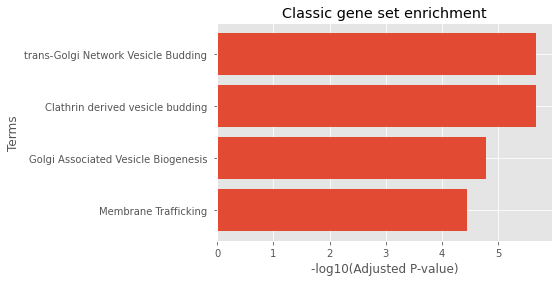

In [29]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:4]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/VastDB/classic_enr_muscle.pdf',format='pdf',bbox_inches='tight')





plt.show()

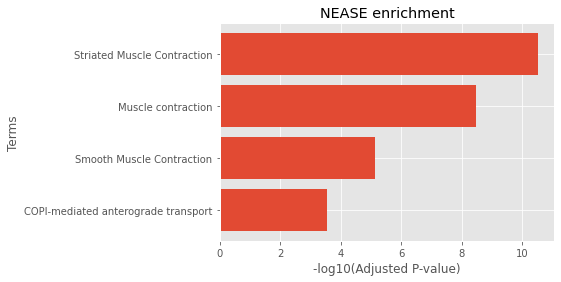

In [30]:
nease_enr=nease_enr.sort_values(by='adj p_value')
Term = nease_enr['Pathway name'][:4]
Pvalues =nease_enr['adj p_value'][:4]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/VastDB/nease_enr_muscle.pdf',format='pdf',bbox_inches='tight')
plt.show()


### Pathway specific analysis

In [31]:
events.path_analysis('R-HSA-397014')

Enrichment of the pathway: Muscle contraction.

Overall p_value:  3.593383586793358e-12




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,TPM1,7168,True,10/18,1.350635e-15,"TPM4,TPM3,ACTA2,TNNI1,TPM1,TNNT2,TNNT1,MYH8,TPM2,MYH6","7171,7170,59,7135,7168,7139,7138,4626,7169,4624"
1,DST,667,False,1/1,1.132232e-02,CALM1,801
2,LIMS1,3987,False,1/8,8.707168e-02,PXN,5829


In [32]:
events.Vis_path('R-HSA-445355',file='AS data/VastDB/')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  1.1714480964783916e-08


Visualization of the pathway generated in: AS data/VastDB/Smooth Muscle Contraction.html


## Permutation analysis

In [45]:
import random


In [46]:
import sys, os
from tqdm import tqdm
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')
    
    # Restore
def enablePrint():
    sys.stdout = sys.__stdout__


In [47]:
p_value_path=3.593383586793358e-12

In [48]:
numb_of_events=len(psi_filtred)
numb_of_events

56

In [ ]:
scores=[]
p_values=[]
for i in tqdm(range(5000)):
    events_shuflled=psi_tissue.EVENT.unique()
    random.shuffle(events_shuflled)
    events_shuflled=events_shuflled[:numb_of_events]
    event_rand=annot[annot.EVENT.isin(events_shuflled)]
    event_rand['start']= event_rand['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
    event_rand['end']= event_rand['COORD_o'].apply(lambda x: x.split('-')[1])
    convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
    input=pd.merge(event_rand,convert_help,left_on='GENE',right_on='Gene name')
    input=input[['Gene stable ID','start','end']].drop_duplicates()
    blockPrint()

    events=nease.run(input, organism='Human')
    nease_enr=events.enrich(database=['Reactome'])
    scores.append(float(nease_enr[nease_enr['Pathway ID'] =='R-HSA-397014']['Nease score']))
    p_values.append(float(nease_enr[nease_enr['Pathway ID'] =='R-HSA-397014']['p_value']))

  7%|▋         | 340/5000 [1:28:40<20:01:32, 15.47s/it]

In [53]:
len(scores)

5000

In [ ]:
for i in tqdm(range(5000)):
    events_shuflled=psi_tissue.EVENT.unique()
    random.shuffle(events_shuflled)
    events_shuflled=events_shuflled[:numb_of_events]
    event_rand=annot[annot.EVENT.isin(events_shuflled)]
    event_rand['start']= event_rand['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
    event_rand['end']= event_rand['COORD_o'].apply(lambda x: x.split('-')[1])
    convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
    input=pd.merge(event_rand,convert_help,left_on='GENE',right_on='Gene name')
    input=input[['Gene stable ID','start','end']].drop_duplicates()
    blockPrint()

    events=nease.run(input, organism='Human')
    nease_enr=events.enrich(database=['Reactome'])
    scores.append(float(nease_enr[nease_enr['Pathway ID'] =='R-HSA-397014']['Nease score']))
    p_values.append(float(nease_enr[nease_enr['Pathway ID'] =='R-HSA-397014']['p_value']))

 21%|██        | 1062/5000 [3:48:00<13:31:08, 12.36s/it]

In [57]:
len([x for x in p_values if x<=p_value_path])/len(p_values)

0.0001

In [58]:
1/len(p_values)


0.0001